In [1]:
from network import CNetwork

In [2]:
import pandas as pd
import numpy as np

In [3]:
from utils import verifyDir

In [4]:
name_dataset = "dataset_1"
dataset_path = "datasetsv2/"
length_cut = 30000
random_flag = True
measures = ["sp"]
feature_selection = 'common_words'

In [5]:
auxiliar_path = 'auxiliar_folder/' + name_dataset   + '/'
verifyDir(auxiliar_path)

In [6]:
df = pd.read_csv(dataset_path + name_dataset + ".csv")

In [7]:
df.head(5)

,label,text,book
0,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Christine Gehring,...",Right Ho Jeeves
1,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Suzanne L. Shell, ...",Tales Of St Austin
2,Joseph Conrad,And that last\n\nword was the single word of ...,Victory
3,Joseph Conrad,\n\n\n\nIf I have ever had these gifts in any ...,Under Western Eyes
4,Bram Stoker,\n\n\n\n Lond...,The Lady Of The Shroud


In [8]:
from utils.text_processing import get_min_len_corpus

In [9]:
print("Min Length:", get_min_len_corpus(list(df["text"])))

Min Length: 55024


In [10]:
from utils.text_processing import get_corpus, get_random_corpus

In [11]:
texts = list(df['text'])

In [12]:
corpus, segmented_corpus = get_corpus(texts, length_cut)

In [14]:
selected_corpus, words_features, word_index, index_word = get_random_corpus(segmented_corpus, remove_punctuation_flag=True, lemmatization_flag=True, feature_selection = feature_selection)

In [15]:
len(words_features)

167

In [16]:
words_features

{'thought': 0,
 'which': 1,
 'in': 2,
 'now': 3,
 'made': 4,
 'than': 5,
 'little': 6,
 'look': 7,
 'where': 8,
 'other': 9,
 'better': 10,
 'have': 11,
 'having': 12,
 'end': 13,
 'reason': 14,
 'see': 15,
 'will': 16,
 'there': 17,
 'through': 18,
 'up': 19,
 'well': 20,
 'what': 21,
 'who': 22,
 'u': 23,
 'on': 24,
 'might': 25,
 'do': 26,
 'set': 27,
 'low': 28,
 'way': 29,
 'three': 30,
 'side': 31,
 'may': 32,
 'every': 33,
 'that': 34,
 'both': 35,
 'been': 36,
 'should': 37,
 'can': 38,
 'our': 39,
 'same': 40,
 'must': 41,
 'called': 42,
 'had': 43,
 'out': 44,
 'few': 45,
 'good': 46,
 'about': 47,
 'take': 48,
 'once': 49,
 'since': 50,
 'young': 51,
 'work': 52,
 'from': 53,
 'wa': 54,
 'even': 55,
 'always': 56,
 'here': 57,
 'down': 58,
 'them': 59,
 'found': 60,
 'brought': 61,
 'over': 62,
 'his': 63,
 'last': 64,
 'year': 65,
 'an': 66,
 'would': 67,
 'and': 68,
 'time': 69,
 'he': 70,
 'some': 71,
 'off': 72,
 'but': 73,
 'these': 74,
 'mind': 75,
 'true': 76,
 'much'

In [17]:
labels = list(df['label'])

In [18]:
total_classes = list(set(labels))  ## or author
print("Total classes: {}".format(len(total_classes)))
number_books = (df[df['label'] == total_classes[0]]).shape[0]
print("Total entities for each class in train: {}".format(number_books))
dict_categories = {cat: index for index, cat in enumerate(total_classes)}

Total classes: 13
Total entities for each class in train: 6


In [19]:
y = [dict_categories[y] for y in labels]

In [20]:
total_classes

['Charles Dickens',
 'Arthur Conan Doyle',
 'Charles Darwin',
 'Thomas Hardy',
 'Bram Stoker',
 'Daniel Defoe',
 'Mark Twain',
 'Jane Austen',
 'Pelham Grenville',
 'George Eliot',
 'Joseph Conrad',
 'Hector Hugh',
 'Allan Poe']

In [21]:
def get_local_features(sequences, word_features, measures):
    all_features_container = []
    for text in sequences:
        obj = CNetwork(text, model=None, index_word=index_word, percentages=None, path="")
        network = obj.create_network()
        local_measure = obj.get_network_measures(network, word_features, word_index, measures)
        all_features_container.append(local_measure)
    return np.array(all_features_container)

In [22]:
X = get_local_features(selected_corpus, words_features, measures)

Nodes: 4044 - Edges: 15529
Len features: 167
[2.25723473 2.20603512 2.06628741 2.33860994 2.39030423 2.4286421
 2.59807074 2.40143458 2.510512   2.50383379 2.63220381 2.23818946
 2.38783082 2.51026465 2.8182043  2.39104625 2.46450655 2.28394756
 2.4328469  2.21395004 2.45486025 2.14370517 2.56764779 2.34405145
 2.20727183 2.49146673 2.37249567 2.99505318 2.86297304 2.38090527
 2.96611427 2.55157062 2.68315607 2.81177344 2.01137769 2.9181301
 2.31634925 2.56072224 2.72446203 2.77961909 2.79965372 2.61637398
 2.69552313 2.16720257 2.22161761 2.8001484  2.33984665 2.20183032
 2.36730151 2.50581252 2.67177838 2.70442741 2.63467722 2.45263418
 2.05095226 2.39055157 2.46401187 2.37942122 2.35072966 2.43210487
 2.42221123 2.58990848 2.31511254 2.26020282 2.5839723  2.55948553
 2.38684145 2.51150136 1.95325254 2.21963888 2.29334652 2.47712095
 2.30892901 2.18476379 2.69601781 2.38684145 2.79297551 2.4340836
 2.50408113 2.64654959 1.9903537  2.62997774 2.44546129 2.7158051
 2.4659906  2.7670047

Nodes: 3805 - Edges: 15669
Len features: 167
[2.36908517 2.30231335 2.05678233 2.3882755  2.28811777 2.49421661
 2.56046267 2.28417455 2.43506835 2.38985279 2.65694006 2.29994742
 2.45636172 2.61750789 2.59516299 2.33412198 2.72082019 2.26550999
 2.43611987 2.20294427 2.45636172 2.2668244  2.47634069 2.54652997
 2.16587802 2.70715037 2.3115142  2.89274448 2.79915878 2.24342797
 2.75709779 2.59121977 2.88170347 2.57807571 2.04731861 3.15536278
 2.28443743 2.68033649 2.59095689 2.82860147 2.60304942 2.68454259
 2.49973712 2.20268139 2.20241851 2.8575184  2.37066246 2.22607781
 2.34016824 2.66666667 2.80178759 2.84043113 2.39143007 2.31466877
 2.04705573 2.46845426 2.39353312 2.46556257 2.37723449 2.46608833
 2.52576236 2.61777077 2.31019979 2.30283912 2.59069401 2.47187171
 2.34490011 2.45478444 1.94532072 2.23449001 2.25920084 2.47870662
 2.44637224 2.16324921 2.79600421 2.36777077 2.55178759 2.40115668
 2.40694006 2.57702419 2.03943218 2.45241851 2.50630915 2.50657203
 2.43165089 2.516

Len features: 167
[2.38742443 2.10374849 2.08029021 2.356711   2.24885127 2.56469166
 2.33035067 2.46819831 2.48125756 2.48415961 2.52503023 2.28440145
 2.68391778 2.43675937 2.4382104  2.35187424 2.62128174 2.37509069
 2.35767836 2.23385732 2.70471584 2.39274486 2.65538089 2.16614268
 2.243289   2.76251511 2.35042322 2.5165659  2.70519952 2.26166868
 2.92406288 2.31293833 2.66723096 2.61886336 2.05900846 2.57920193
 2.47110036 2.76735187 2.78742443 2.17484885 2.62224909 2.82055623
 3.04280532 2.13857316 2.2382104  2.88270859 2.47521161 2.44667473
 2.40822249 2.58863362 2.5637243  2.45296252 2.65973398 2.29649335
 2.08270859 2.53325272 2.43845224 2.46989117 2.30471584 2.1758162
 2.34848851 2.46481258 2.28512696 2.20483676 2.44957678 2.66457074
 2.37049577 2.31608222 1.87908102 2.19733978 2.30931076 2.28923821
 2.3185006  2.21160822 2.51874244 2.46408706 2.74244256 2.48004837
 2.55211608 2.56396614 2.07908102 2.37170496 2.48754534 2.79153567
 2.46094317 2.67690447 2.56082225 2.095526   

Len features: 167
[2.26503714 2.28300983 2.10304337 2.62640786 2.214474   2.50922598
 2.37071651 2.49556674 2.58087707 2.39156482 2.79606997 2.50922598
 2.57632399 2.52887611 2.53055356 2.27318476 2.67457465 2.38797029
 2.53942008 2.1488138  2.45075485 2.15863887 2.46992571 2.34723221
 2.17445483 2.56530074 2.32901989 3.32662353 2.39491972 2.23867721
 2.51162233 2.42415528 2.79175653 2.64030673 2.01294033 2.90630242
 2.33716751 2.86867961 2.5643422  2.73424395 2.68320153 2.76084352
 2.66522885 2.12964294 2.14665708 2.64126528 2.44452432 2.39707644
 2.64102564 2.61778097 2.80086269 2.48166786 2.52048886 2.3759885
 2.08818596 2.40905823 2.52192667 2.60196501 2.29451234 2.24922118
 2.64150491 2.93913252 2.28037383 2.14258327 2.35537982 2.56865564
 2.29115744 2.46273664 1.963815   2.15025162 2.25641026 2.55260005
 2.38677211 2.15432543 2.62425114 2.27534148 2.50035945 2.27653966
 2.37910376 2.36041217 2.02995447 2.57824107 2.35729691 2.68487898
 2.34052241 2.61682243 2.45410975 2.0589504  

Len features: 167
[2.18202122 2.10329425 2.03545505 2.18397543 2.2118928  2.43690676
 2.35203797 2.48659966 2.49106644 2.31518705 2.60106086 2.36097152
 2.51619207 2.59826912 2.46342825 2.28754886 2.42825237 2.29759911
 2.56309324 2.28559464 2.45281965 2.28950307 2.366555   2.62423227
 2.16303741 2.63512004 2.32774986 2.55304299 2.56365159 2.21105528
 3.37772194 2.56644333 2.59910664 2.62060302 1.98799553 2.43467337
 2.23087661 2.68034618 2.63623674 2.63149079 2.65549972 2.59631491
 2.62171971 2.07621441 2.23506421 2.54745952 2.2774986  2.45393635
 2.34729202 2.46845338 2.7585148  2.42518146 2.60580681 2.2361809
 2.01535455 2.3358459  2.63707426 2.48464545 2.38274707 2.2585148
 2.63791178 2.63316583 2.27694026 2.16024567 2.34059185 2.41820212
 2.24232272 2.3559464  1.86599665 2.21049693 2.22417644 2.24176438
 2.5974316  2.1652708  2.68425461 2.39447236 2.92043551 2.32607482
 2.49748744 2.55443886 1.96873255 2.3559464  2.4681742  2.46231156
 2.47375768 2.80318258 2.5625349  2.02512563 2

Len features: 167
[2.3164348  2.16599859 2.05611884 2.1728366  2.31077576 2.28696062
 2.30299458 2.44187692 2.40414996 2.43904739 2.48832822 2.2697477
 2.50153266 2.40014148 2.44564961 2.30605989 2.57462863 2.20655506
 2.41334591 2.25489271 2.66281537 2.19146428 2.68497996 2.55293563
 2.14265503 2.57722235 2.42489979 2.44682858 2.6762556  2.28295213
 2.71563311 2.49823155 2.66352275 2.95661401 2.04456496 2.72105635
 2.34378684 2.58594671 2.76491394 2.77293091 2.62107993 2.7769394
 2.4423485  2.13086536 2.21103513 2.66092903 2.39684037 2.28578166
 2.359585   2.47300165 2.84932799 2.56920538 2.71162462 2.28672483
 2.04267861 2.31619901 2.67153973 2.34001415 2.42725772 2.3164348
 2.44470644 2.43551049 2.3742042  2.22636171 2.45885404 2.32115067
 2.34755954 2.46545626 1.90780476 2.28955435 2.24215987 2.47040792
 2.58146664 2.20325395 2.50176845 2.55293563 2.60952606 2.36972412
 2.38198538 2.62744636 2.00424428 2.41546805 2.40697949 2.59372789
 2.46663523 2.62909691 2.4567319  2.05729781 2.

Len features: 167
[2.12515188 2.05103281 1.92750101 2.17294451 2.14054273 2.4236533
 2.17618469 2.40421223 2.25961928 2.19724585 2.41352774 2.1745646
 2.21020656 2.36289996 2.32563791 2.1855002  2.41231268 2.11988659
 2.69947347 2.21182665 2.14216282 2.12636695 2.22235723 2.24220332
 2.12150668 2.30660186 2.14985824 2.44309437 2.46739571 2.14418793
 2.5346294  2.74159579 2.37707574 2.55285541 1.89671932 2.4491697
 2.26447955 2.35317942 2.50749291 2.40583232 2.43904415 2.65208586
 2.31389226 1.99918996 2.12515188 2.81004455 2.14702309 2.27987039
 2.28594573 2.53584447 2.57108141 2.47063588 2.51194816 2.28432564
 1.94977724 2.38598623 2.33535844 2.36371    2.27541515 2.08424463
 2.23369785 2.21344674 2.31389226 2.10125557 2.34953422 2.24706359
 2.32887809 2.20980154 1.72255974 2.08140948 2.03361685 2.21182665
 2.23329283 1.9963548  2.4945322  2.23369785 2.34953422 2.22519239
 2.17051438 2.17861482 1.83232078 2.42648846 2.65613609 2.29850142
 2.13487242 2.96435804 2.42527339 1.95787768 2.

Len features: 167
[2.43426124 2.19978587 2.02077088 2.39486081 2.28929336 2.4862955
 2.50792291 2.44111349 2.35867238 2.36573876 2.8764454  2.26466809
 2.86873662 2.38929336 2.75995717 2.31284797 2.54775161 2.16852248
 2.37687366 2.20406852 2.35310493 2.21006424 2.62976445 2.18051392
 2.20107066 2.58201285 2.27880086 2.34882227 2.87473233 2.25353319
 2.41092077 2.49593148 2.61284797 2.40321199 2.01905782 2.49014989
 2.35117773 2.94197002 2.51284797 2.35802998 2.58993576 2.82334047
 2.46531049 2.19764454 2.1633833  2.80963597 2.31134904 2.17216274
 2.3111349  2.47408994 2.75074946 2.69593148 2.50920771 2.28479657
 2.16124197 2.3503212  2.69336188 2.24753747 2.23832976 2.11070664
 2.46809422 2.34582441 2.31755889 2.32976445 2.44111349 2.25010707
 2.36552463 2.32441113 1.78736617 2.14453961 2.37430407 2.31777302
 2.375803   2.13404711 2.17344754 3.05653105 2.99057816 2.55374732
 2.43019272 2.69036403 2.02997859 2.58244111 2.46488223 2.54582441
 2.45974304 2.37944325 2.33062099 2.03083512 

Nodes: 3726 - Edges: 15329
Len features: 167
[2.34201342 2.16402685 1.98845638 2.36107383 2.30147651 2.39946309
 2.28134228 2.30120805 2.35328859 2.57959732 2.61557047 2.20161074
 2.50228188 2.38013423 2.71812081 2.27892617 2.39543624 2.35167785
 2.50577181 2.27060403 2.34711409 2.14389262 2.64268456 2.30013423
 2.12724832 2.48295302 2.30872483 2.48912752 2.70872483 2.25234899
 2.72751678 2.37315436 2.73771812 2.68134228 1.9790604  2.83838926
 2.48778523 2.47919463 2.54657718 2.38845638 2.64053691 2.58765101
 2.62845638 2.09932886 2.22255034 2.57959732 2.27302013 2.20214765
 2.32026846 2.93154362 2.6314094  2.36644295 2.32241611 2.27033557
 2.03060403 2.39087248 2.44053691 2.47704698 2.27194631 2.27919463
 2.34469799 2.6233557  2.49449664 2.22067114 2.41449664 2.31033557
 2.28697987 2.52       1.83651007 2.2252349  2.2990604  2.55248322
 2.51033557 2.1433557  2.52322148 2.30872483 3.2        2.18604027
 2.41557047 2.39489933 1.94442953 2.47812081 2.43489933 2.4738255
 2.35167785 2.7855

Len features: 167
[2.42857143 2.24364592 2.06375986 2.36546889 2.30017528 2.32120947
 2.4673532  2.27344435 2.35582822 2.25021911 2.55828221 2.41148116
 2.65687993 2.69631902 2.54031551 2.40972831 2.3950482  2.31945662
 2.49758983 2.33413672 2.49780894 2.34706398 2.48663453 2.5291411
 2.1849255  2.6413234  2.4673532  2.34991236 2.79228747 2.27563541
 2.65731814 2.45880806 2.8948291  2.78001753 2.04469763 2.76928133
 2.3586766  2.87226117 2.6450482  2.79798422 2.76599474 2.92287467
 2.83873795 2.16827344 2.25547765 2.75460123 2.28505697 2.36634531
 2.43141981 2.7280894  2.82822086 2.49014023 2.39219982 2.41739702
 2.09290096 2.41170026 2.73685364 2.66783523 2.4636284  2.27716915
 2.55521472 2.80411919 2.40994741 2.23028046 2.47020158 2.41148116
 2.23816827 2.52059597 1.93930762 2.24474145 2.37423313 2.49364592
 2.43580193 2.22436459 2.47940403 2.40753725 2.69609991 2.2719106
 2.68448729 2.83106924 2.0326468  2.64723926 2.51205083 2.76643295
 2.36919369 2.83917616 2.61634531 2.07142857 2

Len features: 167
[2.55351784 2.04568189 1.94031344 2.39313104 2.3717906  2.22074025
 2.52884295 2.62354118 2.52384128 2.12804268 2.29876626 2.1147049
 2.55318439 2.60353451 2.72457486 2.2960987  2.15138379 2.33111037
 2.4378126  2.52150717 2.62954318 2.30110037 2.88296099 2.4954985
 2.12304101 2.45781927 2.72924308 2.64721574 2.70923641 2.48716239
 2.53251084 2.48482828 2.39746582 2.44981661 1.98932978 2.48549517
 2.32344115 2.47215739 2.30310103 2.3807936  2.46648883 2.56385462
 2.43281094 2.25741914 2.3567856  2.41613871 2.32744248 2.74524842
 2.49783261 2.65155052 2.68022674 2.41447149 2.43114371 2.14904968
 2.56652217 2.28609537 2.56452151 2.32810937 2.41413805 2.32777593
 2.39779927 2.73324441 2.5891964  2.47415805 2.42514171 2.4984995
 2.27675892 2.32544181 1.80893631 2.25108369 2.67222407 2.18406135
 2.5981994  2.16838946 2.19373124 2.77092364 2.45415138 2.21040347
 2.5921974  3.24674892 1.90730243 3.05901967 2.59086362 2.24474825
 2.18772924 2.76958986 2.77792598 2.05535178 2.

Len features: 167
[2.30478088 2.29254411 2.05179283 2.36994878 2.36653386 2.65424018
 2.56089926 2.29766648 2.43227092 2.59789414 2.76237906 2.33181559
 2.47951053 2.61866818 2.71371656 2.32783153 2.57569721 2.25156517
 2.47979511 2.12749004 2.49089357 2.1457029  2.63403529 2.30221969
 2.10700057 2.56915196 2.27973819 2.57455891 3.00256118 2.22851451
 2.96869664 2.66676153 2.44735344 2.71172453 2.00398406 2.78286853
 2.39442231 2.75697211 2.50853728 2.74331246 2.57882755 2.69749573
 2.63375071 2.16277746 2.14968697 2.73619806 2.35315879 2.1457029
 2.42231076 2.58081958 2.70745589 2.56459875 2.50256118 2.37108708
 2.03187251 2.88076266 2.63346614 2.27945361 2.30620376 2.51849744
 2.4786568  2.46898122 2.31730222 2.31331816 2.47922595 2.56801366
 2.37478657 2.45959021 1.96101309 2.22993739 2.2831531  2.48662493
 2.23420603 2.20802504 2.78770632 2.45503699 2.80705748 2.40210586
 2.54809334 2.5651679  1.99601594 2.65907797 2.45645987 3.21570859
 2.65110985 2.66676153 2.30051224 1.99772339 

Len features: 167
[2.42731536 2.28565846 2.05255959 2.40074248 2.42438453 2.49140289
 2.40992575 2.38745604 2.52930832 2.25615475 3.12114107 2.30812818
 2.82766706 2.58030481 3.01602188 2.44353263 2.6957796  2.29816335
 2.56017976 2.27002735 2.43220008 2.30988667 2.55685815 2.37612349
 2.30128957 2.86342321 2.47499023 2.49081673 2.52207894 2.28546307
 2.49706917 2.49277061 2.88276671 2.5873388  2.05627198 3.45115279
 2.43220008 2.92633841 2.84915983 2.68933177 2.63599062 2.92086753
 2.47401329 2.2063306  2.29933568 2.55001954 2.31027745 2.3601016
 2.42184447 2.64224306 2.70769832 2.42028136 2.54239937 2.41813208
 2.15357562 2.56389215 2.65846034 2.45877296 2.34017194 2.23935131
 2.5191481  2.60746385 2.34779211 2.23368503 2.53829621 2.44998046
 2.28565846 2.58518953 1.88882376 2.29757718 2.4144197  2.36225088
 2.39019148 2.335678   2.89605315 2.40875342 2.87143415 2.44294646
 2.4876905  2.50234467 2.10902696 2.34075811 2.46268073 2.83196561
 2.43767097 2.49667839 2.48007034 2.11527941 

Len features: 167
[2.5457051  2.24529169 2.17983463 2.61024345 2.41593937 2.61782269
 2.50849793 2.53192467 2.58911346 2.53674782 2.63481856 2.39503904
 2.50757924 2.67524116 2.9754249  2.45314653 2.77423059 2.50275609
 2.59623335 2.34451079 2.57946716 2.37276068 2.53835554 2.82567754
 2.39756546 2.80018374 2.68787322 2.66949931 2.5649977  2.39940285
 2.72439136 2.63114378 3.0351401  2.71819017 2.1828204  2.79559026
 2.65778594 2.74322462 2.63504823 2.74207625 2.76642168 2.94143316
 2.85186036 2.45452458 2.3392283  2.75447864 2.47243914 2.53881488
 2.53858521 2.70808452 2.88608176 2.67822692 2.87207166 2.4138723
 2.2328893  2.4595774  2.86518144 2.59462563 2.3945797  2.41869545
 2.68350942 2.69981626 2.50160772 2.27537896 2.6203491  2.65824529
 2.43752871 2.5149288  2.00045935 2.404226   2.2574644  2.57165825
 2.51768489 2.44579697 2.63022508 2.70762517 3.17822692 2.52113
 2.49862196 2.62586128 2.16444649 2.58474966 2.68741387 2.73702343
 2.308452   2.72531006 2.61460726 2.2425356  2.5

In [23]:
print("Lenght of features:", len(X[0]))

Lenght of features: 167


# Visualize

In [24]:
from utils.visualize_tsne import visualize_tsne

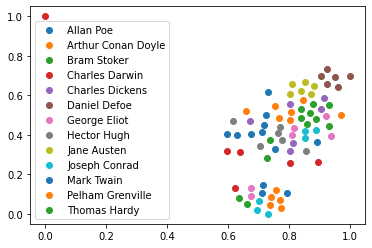

In [25]:
visualize_tsne(X, labels)

# Normalize data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)

In [27]:
X = scaler.fit_transform(X)

# Classification

In [28]:
import classifierv2

In [29]:
obj = classifierv2.Classification(X, y)
scores = obj.classification()

[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 7  9 10  1 11 10  5  9  2  1 12  9  9 11  9 11]
Score 0.375
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 7  9 10  3 12 11  5 11  2  1  0  8 10 11  0  3]
Score 0.75
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 7  0  8  0 12  8  5  0  2  0  0  8  0  0  0  0]
Score 0.375
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 7  9 10  3 12 11  5 11  2  1  0  8 10  0  0  3]
Score 0.75
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 4  9  6  4  3  6  5  6  2  6  6  6  6  6  9 12]
Score 0.25


/home/mailaucq/Documents/book_classification/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# sin lemmatizar
Score 0.4375
Score 0.6875
Score 0.5
Score 0.75


# lematizando
Score 0.375
Score 0.8125
Score 0.4375
Score 1.0